# Collecting data 

In [2]:
import numpy as n
import pandas as pd
import seaborn as sns 
from matplotlib import pyplot as plt 
import math as m
%matplotlib inline

ds = pd.read_csv('train.csv')

In [3]:
#ds.shape
# no. of passenger in dataset
np = len(ds)
np

891

In [4]:
ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# checking null values 
#ds.head().isnull()

# Analyzing data

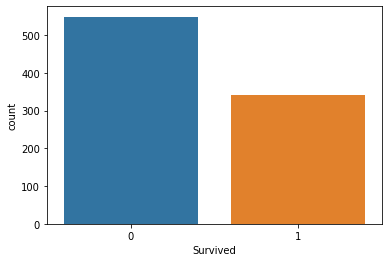

In [6]:
# countplot for survived data
sns.countplot(x='Survived', data=ds)

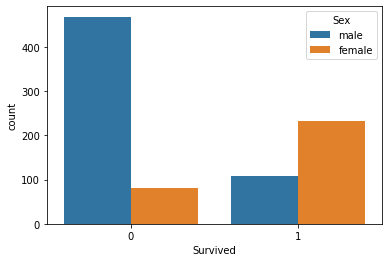

In [7]:
# for comparin two variable of dataset we use hue 
sns.countplot(x='Survived',hue = 'Sex',data=ds)
# we came to know that female survival is more than male survival

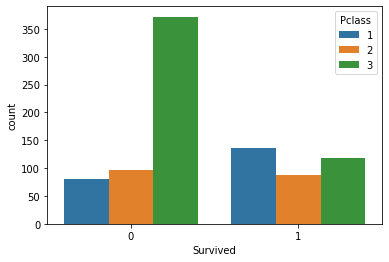

In [8]:
# to see which passenger class survived more  1>3>2
sns.countplot(x='Survived',hue ='Pclass',data=ds)

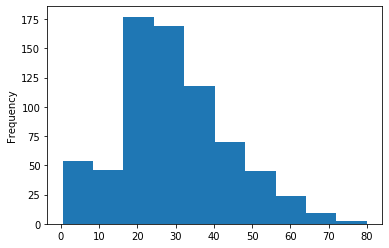

In [9]:
# Analysis on age column
ds['Age'].plot.hist()

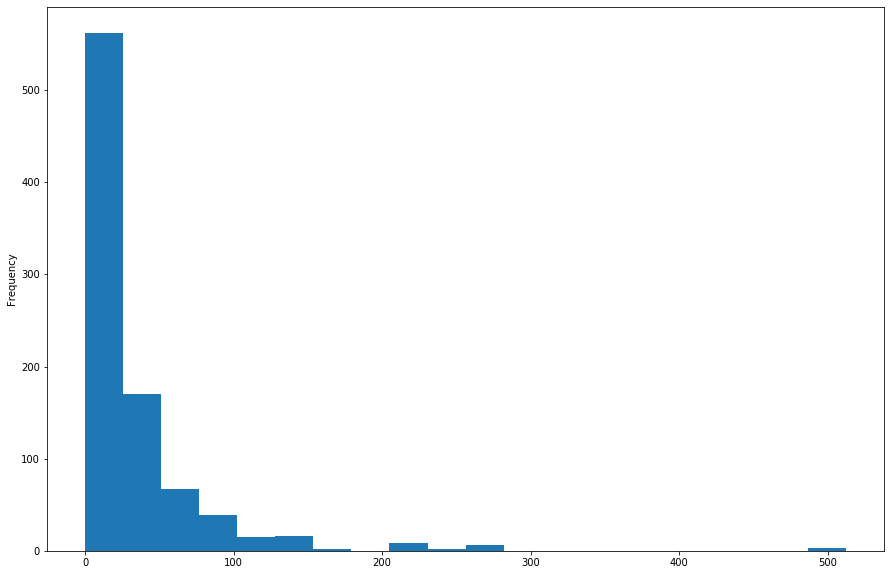

In [10]:
ds['Fare'].plot.hist(bins = 20,figsize =(15,10))

In [11]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


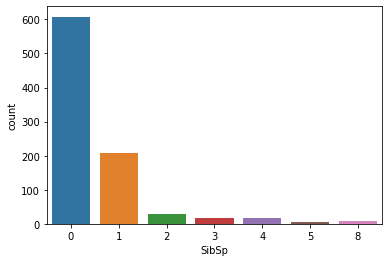

In [12]:
sns.countplot(x='SibSp',data=ds)

# Data Wrangling/ Data cleaning

In [13]:
# to check the number of null values in attributes
ds.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

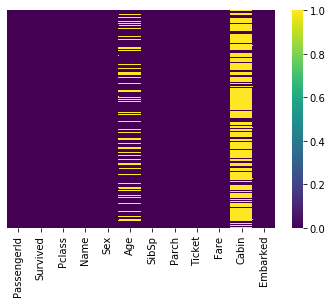

In [14]:
# to visually analyse the null value we use heatmap
sns.heatmap(ds.isnull(),yticklabels=False , cmap='viridis')

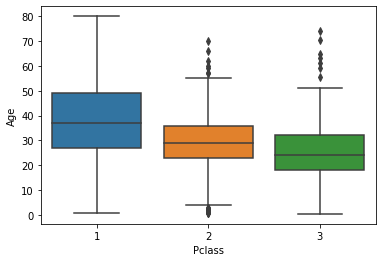

In [15]:
# to check the relationship beyween passenger classes and age
sns.boxplot(x='Pclass',y='Age',data=ds)

In [16]:
# to drop column cabin 
#inplace: Makes changes in original Data Frame if True.
# axis =0 -> row and axis =1 -> column
ds.drop('Cabin', axis = 1,inplace=True)

In [17]:
ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [18]:
# to drop NAN value
ds.dropna(inplace=True)

In [19]:
ds.notna().sum()

PassengerId    712
Survived       712
Pclass         712
Name           712
Sex            712
Age            712
SibSp          712
Parch          712
Ticket         712
Fare           712
Embarked       712
dtype: int64

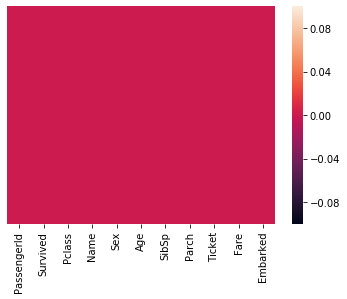

In [20]:
sns.heatmap(ds.isnull(),yticklabels=False)

In [21]:
ds.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

whenever u apply ML don't take string variables so we convert it into dummy vaues for example male =1 and female to 0

## Changing strings variable to dummies values for logistric reg. i.e 0 or 1

In [22]:
# we only need one column for this so we drop female column using drop_first command
sex=pd.get_dummies(ds['Sex'],drop_first=True)

In [23]:
# for embarked column also
embarked = pd.get_dummies(ds['Embarked'],drop_first=True) # we dropped first bcoz if Q and S both =0 means c=1
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [24]:
# for passenger class 
pclass =pd.get_dummies(ds['Pclass'],drop_first=True)
pclass.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [43]:
# concatenate column into dataset
ds=pd.concat([ds,sex,embarked,pclass],axis =1)



In [45]:
# drop the string value table 
ds.drop(['PassengerId','Name','Ticket'],axis = 1,inplace = True)

In [46]:
ds.head()

,Survived,Age,SibSp,Parch,Fare,male,2,3,Q,S,...,male,Q,S,2,3,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1,...,1,0,1,0,1,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1,...,0,0,1,0,1,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1,...,1,0,1,0,1,1,0,1,0,1


# Train Data

In [47]:
# independent variable 
x = ds.drop('Survived',axis =1)
# dependent variable 
y = ds['Survived']

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
log = LogisticRegression()

In [53]:
log.fit(X_train,y_train)

C:\Users\pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
prediction = log.predict(X_test)

In [55]:
from sklearn.metrics import classification_report

In [56]:
classification_report(y_test,prediction)

'              precision    recall  f1-score   support\n\n           0       0.81      0.83      0.82       126\n           1       0.74      0.72      0.73        88\n\n    accuracy                           0.78       214\n   macro avg       0.77      0.77      0.77       214\nweighted avg       0.78      0.78      0.78       214\n'

In [57]:
from sklearn.metrics import confusion_matrix

In [58]:
confusion_matrix(y_test,prediction)

array([[104,  22],
       [ 25,  63]], dtype=int64)

In [59]:
 from sklearn.metrics import accuracy_score

In [60]:
accuracy_score(y_test,prediction)

0.780373831775701